In [1]:
from LRGradientDescent import LogisticRegressionGradientDescent as LRGD
from show_images import show_images
import numpy as np
from scipy.special import logsumexp
from scipy.special import expit as sigm #sigmoid function
from numpy import genfromtxt
from matplotlib import pyplot as plt

import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import sklearn.linear_model
import sklearn.tree
import sklearn.metrics

from scipy.special import expit as sigm

In [2]:
def calc_TP_TN_FP_FN(ytrue_N, yhat_N):
    ''' Compute counts of four possible outcomes of a binary classifier for evaluation.
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yhat_N : 1D array of floats
        Each entry represents a predicted binary value (either 0 or 1).
        One entry per example in current dataset.
        Needs to be same size as ytrue_N.

    Returns
    -------
    TP : float
        Number of true positives
    TN : float
        Number of true negatives
    FP : float
        Number of false positives
    FN : float
        Number of false negatives
    '''
    TP = 0.0
    TN = 0.0
    FP = 0.0
    FN = 0.0
    FP_id=[]
    FN_id=[]
    l=ytrue_N.size
    for i in range(0,l):
        if (yhat_N[i]==1):
            if (ytrue_N[i]==1):
                TP=TP+1.0
            else:
                FP=FP+1.0
                FP_id.append(i)
        else:
            if (ytrue_N[i]==0):
                TN=TN+1.0
            else:
                FN=FN+1.0
                FN_id.append(i)      
    return TP, TN, FP, FN, FP_id, FN_id

def calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh):
    ''' Compute performance metrics for a given probabilistic classifier and threshold
    '''
    tp, tn, fp, fn, FPSample, FNSample = calc_TP_TN_FP_FN(ytrue_N, yproba1_N >= thresh)
    ## Compute ACC, TPR, TNR, etc.
    acc = (tp + tn) / float(tp + tn + fp + fn + 1e-10)
    tpr = tp / float(tp + fn + 1e-10)
    tnr = tn / float(fp + tn + 1e-10)
    ppv = tp / float(tp + fp + 1e-10)
    npv = tn / float(tn + fn + 1e-10)
    
    return acc, tpr, tnr, ppv, npv, FPSample, FNSample

def print_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh):
    ''' Pretty print perf. metrics for a given probabilistic classifier and threshold
    '''
    acc, tpr, tnr, ppv, npv = calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh)
    
    ## Pretty print the results
    print("%.3f ACC" % acc)
    print("%.3f TPR" % tpr)
    print("%.3f TNR" % tnr)
    print("%.3f PPV" % ppv)
    print("%.3f NPV" % npv)
    
def calc_confusion_matrix_for_threshold(ytrue_N, yproba1_N, thresh):
    ''' Compute the confusion matrix for a given probabilistic classifier and threshold
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset
        Needs to be same size as ytrue_N
    thresh : float
        Scalar threshold for converting probabilities into hard decisions
        Calls an example "positive" if yproba1 >= thresh

    Returns
    -------
    cm_df : Pandas DataFrame
        Can be printed like print(cm_df) to easily display results
    '''
    
    #print(ytrue_N, yproba1_N >= thresh)
    cm = sklearn.metrics.confusion_matrix(ytrue_N, yproba1_N >= thresh)
    cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
    cm_df.columns.name = 'Predicted'
    cm_df.index.name = 'True'
    return cm_df

In [3]:
x_all= genfromtxt('data_digits_8_vs_9_noisy/x_train.csv', delimiter=',')[1:]
#xbias_NG = lr.insert_final_col_of_all_ones(x_all)
y_all= genfromtxt('data_digits_8_vs_9_noisy/y_train.csv', delimiter=',')[1:]

In [4]:
#print(x_all[0:11,0:10])
x_tr=x_all[2000:]
x_va=x_all[:2000]
#print(x_va.shape[0])
y_tr=y_all[2000:]
y_va=y_all[:2000]

In [5]:
#Moderate Step Size
lrM = LRGD(alpha=10.0, step_size=0.5, num_iterations=10000,init_w_recipe='zeros')
lrM.fit(x_tr, y_tr) 

Initializing w_G with 785 features using recipe: zeros
Running up to 10000 iters of gradient descent with step_size 0.5
iter    0/10000  loss         1.000000  avg_L1_norm_grad         0.024676  w[0]    0.000 bias    0.000
iter    1/10000  loss         0.652834  avg_L1_norm_grad         0.058458  w[0]   -0.001 bias    0.002
iter    2/10000  loss         4.480393  avg_L1_norm_grad         0.167414  w[0]    0.012 bias    0.145
iter    3/10000  loss         9.642480  avg_L1_norm_grad         0.151994  w[0]   -0.025 bias   -0.212
iter    4/10000  loss         1.741418  avg_L1_norm_grad         0.129421  w[0]    0.010 bias    0.151
iter    5/10000  loss         6.221672  avg_L1_norm_grad         0.151786  w[0]   -0.018 bias   -0.121
iter    6/10000  loss         2.955412  avg_L1_norm_grad         0.146658  w[0]    0.016 bias    0.241
iter    7/10000  loss         4.446966  avg_L1_norm_grad         0.147311  w[0]   -0.016 bias   -0.069
iter    8/10000  loss         2.279642  avg_L1_norm_grad

iter 3100/10000  loss         0.100381  avg_L1_norm_grad         0.000003  w[0]   -0.050 bias    1.151
iter 3101/10000  loss         0.100381  avg_L1_norm_grad         0.000003  w[0]   -0.050 bias    1.151
iter 3200/10000  loss         0.100381  avg_L1_norm_grad         0.000003  w[0]   -0.050 bias    1.155
iter 3201/10000  loss         0.100381  avg_L1_norm_grad         0.000003  w[0]   -0.050 bias    1.155
iter 3300/10000  loss         0.100380  avg_L1_norm_grad         0.000002  w[0]   -0.050 bias    1.158
iter 3301/10000  loss         0.100380  avg_L1_norm_grad         0.000002  w[0]   -0.050 bias    1.158
iter 3400/10000  loss         0.100379  avg_L1_norm_grad         0.000002  w[0]   -0.050 bias    1.161
iter 3401/10000  loss         0.100379  avg_L1_norm_grad         0.000002  w[0]   -0.050 bias    1.161
iter 3500/10000  loss         0.100379  avg_L1_norm_grad         0.000002  w[0]   -0.050 bias    1.163
iter 3501/10000  loss         0.100379  avg_L1_norm_grad         0.000002

In [6]:
#Small Step Size
lrS = LRGD(alpha=10.0, step_size=0.1, num_iterations=10000,init_w_recipe='zeros')
lrS.fit(x_tr, y_tr) 

Initializing w_G with 785 features using recipe: zeros
Running up to 10000 iters of gradient descent with step_size 0.1
iter    0/10000  loss         1.000000  avg_L1_norm_grad         0.024676  w[0]    0.000 bias    0.000
iter    1/10000  loss         0.870389  avg_L1_norm_grad         0.024782  w[0]   -0.000 bias    0.000
iter    2/10000  loss         0.773694  avg_L1_norm_grad         0.021132  w[0]    0.000 bias    0.009
iter    3/10000  loss         0.700361  avg_L1_norm_grad         0.022997  w[0]   -0.000 bias    0.006
iter    4/10000  loss         0.642664  avg_L1_norm_grad         0.020912  w[0]    0.001 bias    0.016
iter    5/10000  loss         0.595566  avg_L1_norm_grad         0.021399  w[0]   -0.000 bias    0.011
iter    6/10000  loss         0.554936  avg_L1_norm_grad         0.018142  w[0]    0.001 bias    0.021
iter    7/10000  loss         0.520284  avg_L1_norm_grad         0.016834  w[0]    0.000 bias    0.017
iter    8/10000  loss         0.490452  avg_L1_norm_grad

iter 3100/10000  loss         0.102787  avg_L1_norm_grad         0.000113  w[0]   -0.053 bias    0.766
iter 3101/10000  loss         0.102785  avg_L1_norm_grad         0.000113  w[0]   -0.053 bias    0.766
iter 3200/10000  loss         0.102628  avg_L1_norm_grad         0.000109  w[0]   -0.053 bias    0.775
iter 3201/10000  loss         0.102627  avg_L1_norm_grad         0.000109  w[0]   -0.053 bias    0.775
iter 3300/10000  loss         0.102482  avg_L1_norm_grad         0.000104  w[0]   -0.053 bias    0.784
iter 3301/10000  loss         0.102480  avg_L1_norm_grad         0.000104  w[0]   -0.053 bias    0.784
iter 3400/10000  loss         0.102346  avg_L1_norm_grad         0.000100  w[0]   -0.054 bias    0.793
iter 3401/10000  loss         0.102345  avg_L1_norm_grad         0.000100  w[0]   -0.054 bias    0.793
iter 3500/10000  loss         0.102220  avg_L1_norm_grad         0.000097  w[0]   -0.054 bias    0.802
iter 3501/10000  loss         0.102219  avg_L1_norm_grad         0.000097

iter 7100/10000  loss         0.100600  avg_L1_norm_grad         0.000030  w[0]   -0.050 bias    1.004
iter 7101/10000  loss         0.100600  avg_L1_norm_grad         0.000029  w[0]   -0.050 bias    1.005
iter 7200/10000  loss         0.100589  avg_L1_norm_grad         0.000029  w[0]   -0.050 bias    1.008
iter 7201/10000  loss         0.100588  avg_L1_norm_grad         0.000029  w[0]   -0.050 bias    1.008
iter 7300/10000  loss         0.100578  avg_L1_norm_grad         0.000028  w[0]   -0.050 bias    1.012
iter 7301/10000  loss         0.100577  avg_L1_norm_grad         0.000028  w[0]   -0.050 bias    1.012
iter 7400/10000  loss         0.100567  avg_L1_norm_grad         0.000027  w[0]   -0.050 bias    1.015
iter 7401/10000  loss         0.100567  avg_L1_norm_grad         0.000027  w[0]   -0.050 bias    1.015
iter 7500/10000  loss         0.100557  avg_L1_norm_grad         0.000026  w[0]   -0.050 bias    1.018
iter 7501/10000  loss         0.100557  avg_L1_norm_grad         0.000026

In [7]:
#Large Step Size
lrL = LRGD(alpha=10.0, step_size=1, num_iterations=10000,init_w_recipe='zeros')
lrL.fit(x_tr, y_tr) 

Initializing w_G with 785 features using recipe: zeros
Running up to 10000 iters of gradient descent with step_size 1
iter    0/10000  loss         1.000000  avg_L1_norm_grad         0.024676  w[0]    0.000 bias    0.000
iter    1/10000  loss         0.680851  avg_L1_norm_grad         0.073857  w[0]   -0.002 bias    0.004
iter    2/10000  loss        12.430986  avg_L1_norm_grad         0.168269  w[0]    0.032 bias    0.358
iter    3/10000  loss        16.612874  avg_L1_norm_grad         0.152061  w[0]   -0.043 bias   -0.360
iter    4/10000  loss         6.307122  avg_L1_norm_grad         0.165638  w[0]    0.027 bias    0.366
iter    5/10000  loss        16.392406  avg_L1_norm_grad         0.152081  w[0]   -0.046 bias   -0.340
iter    6/10000  loss         2.325717  avg_L1_norm_grad         0.086335  w[0]    0.024 bias    0.386
iter    7/10000  loss         2.622341  avg_L1_norm_grad         0.089287  w[0]   -0.013 bias    0.026
iter    8/10000  loss         2.359122  avg_L1_norm_grad  

ValueError: Divergence detected. Loss is increasing but should be decreasing!. Try a smaller step_size than current value 1.000e+00.

In [8]:
#Moderate Step Size
lossM=np.array(lrM.trace_loss)
gdL1M=np.array(lrM.trace_L1_norm_of_grad)
w154M=np.asarray(np.matrix(lrM.trace_w).T[154])[-1]
wbiaM=np.asarray(np.matrix(lrM.trace_w).T[-1] )[-1]
indxM=range(0,lossM.size)

#Small Step Size
lossS=np.array(lrS.trace_loss)
gdL1S=np.array(lrS.trace_L1_norm_of_grad)
w154S=np.asarray(np.matrix(lrS.trace_w).T[154])[-1]
wbiaS=np.asarray(np.matrix(lrS.trace_w).T[-1] )[-1]
indxS=range(0,lossS.size)

#Large Step Size
lossL=np.array(lrL.trace_loss)
gdL1L=np.array(lrL.trace_L1_norm_of_grad)
w154L=np.asarray(np.matrix(lrL.trace_w).T[154])[-1]
wbiaL=np.asarray(np.matrix(lrL.trace_w).T[-1] )[-1]
indxL=range(0,lossL.size)

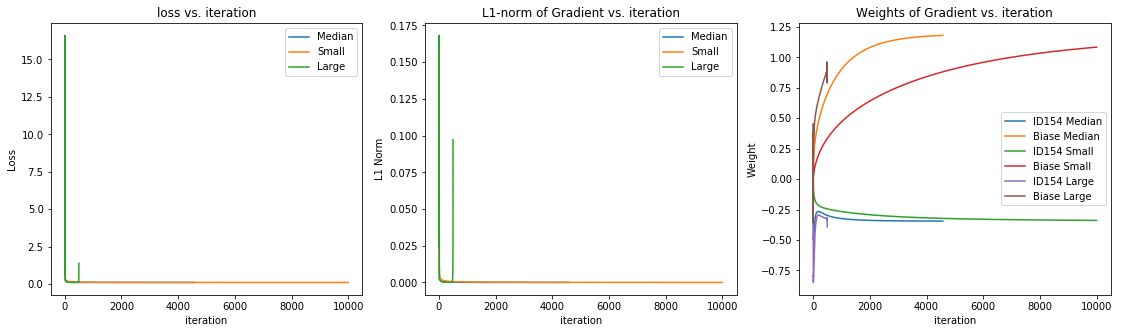

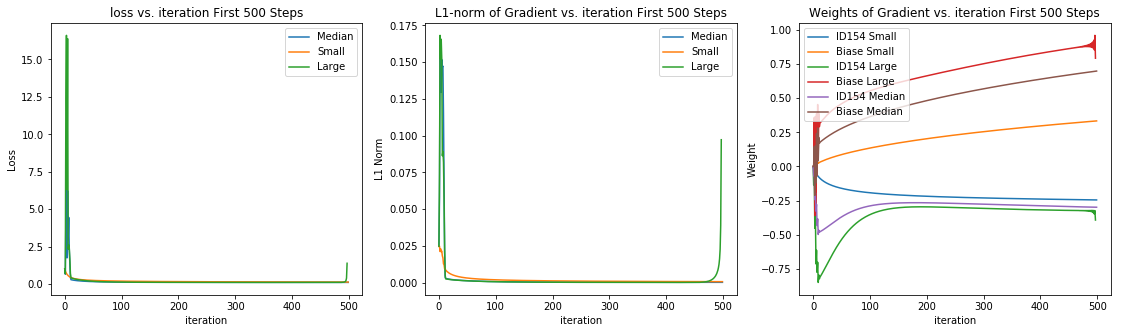

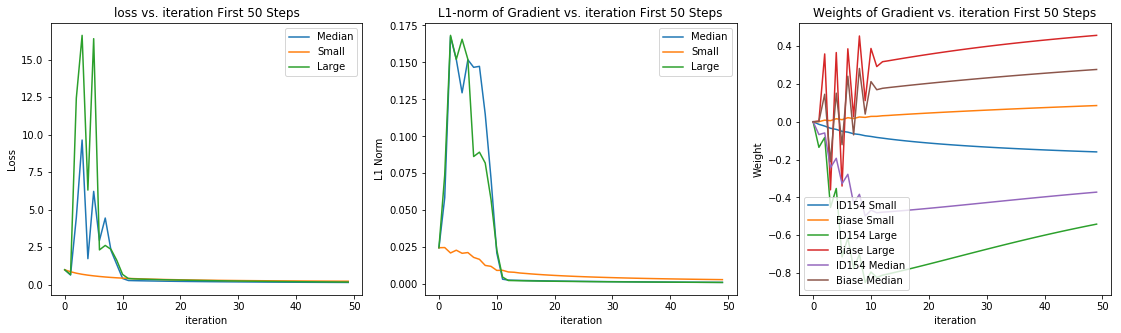

In [9]:
fig2a, axes_arr = plt.subplots(nrows=1, ncols=3,figsize=(19,5))

ax1=axes_arr[0]
ax1.set_title('loss vs. iteration'); ax1.set_xlabel('iteration'); ax1.set_ylabel('Loss');

ax1.plot(indxM, lossM, label='Median');
ax1.plot(indxS, lossS, label='Small');
ax1.plot(indxL, lossL, label='Large');
ax1.legend();

ax2=axes_arr[1]
ax2.set_title('L1-norm of Gradient vs. iteration'); ax2.set_xlabel('iteration'); ax2.set_ylabel('L1 Norm');
ax2.plot(indxM, gdL1M, label='Median');
ax2.plot(indxS, gdL1S, label='Small');
ax2.plot(indxL, gdL1L, label='Large');
ax2.legend();

ax3=axes_arr[2]
ax3.set_title('Weights of Gradient vs. iteration'); ax3.set_xlabel('iteration'); ax3.set_ylabel('Weight');
ax3.plot(indxM, w154M, label='ID154 Median')
ax3.plot(indxM, wbiaM, label='Biase Median')
ax3.plot(indxS, w154S, label='ID154 Small')
ax3.plot(indxS, wbiaS, label='Biase Small')
ax3.plot(indxL, w154L, label='ID154 Large')
ax3.plot(indxL, wbiaL, label='Biase Large')
ax3.legend();

fig2a2, axes_arr2 = plt.subplots(nrows=1, ncols=3,figsize=(19,5))

ax1=axes_arr2[0]
ax1.set_title('loss vs. iteration First 500 Steps'); ax1.set_xlabel('iteration'); ax1.set_ylabel('Loss');

ax1.plot(indxM[:500], lossM[:500], label='Median');
ax1.plot(indxS[:500], lossS[:500], label='Small');
ax1.plot(indxL, lossL, label='Large');
ax1.legend();

ax2=axes_arr2[1]
ax2.set_title('L1-norm of Gradient vs. iteration First 500 Steps'); ax2.set_xlabel('iteration'); ax2.set_ylabel('L1 Norm');
ax2.plot(indxM[:500], gdL1M[:500], label='Median');
ax2.plot(indxS[:500], gdL1S[:500], label='Small');
ax2.plot(indxL, gdL1L, label='Large');
ax2.legend();

ax3=axes_arr2[2]
ax3.set_title('Weights of Gradient vs. iteration First 500 Steps'); ax3.set_xlabel('iteration'); ax3.set_ylabel('Weight');
ax3.plot(indxS[:500], w154S[:500], label='ID154 Small')
ax3.plot(indxS[:500], wbiaS[:500], label='Biase Small')
ax3.plot(indxL, w154L, label='ID154 Large')
ax3.plot(indxL, wbiaL, label='Biase Large')
ax3.plot(indxM[:500], w154M[:500], label='ID154 Median')
ax3.plot(indxM[:500], wbiaM[:500], label='Biase Median')
ax3.legend();

fig2a3, axes_arr3 = plt.subplots(nrows=1, ncols=3,figsize=(19,5))

ax1=axes_arr3[0]
ax1.set_title('loss vs. iteration First 50 Steps'); ax1.set_xlabel('iteration'); ax1.set_ylabel('Loss');

ax1.plot(indxM[:50], lossM[:50], label='Median');
ax1.plot(indxS[:50], lossS[:50], label='Small');
ax1.plot(indxL[:50], lossL[:50], label='Large');
ax1.legend();

ax2=axes_arr3[1]
ax2.set_title('L1-norm of Gradient vs. iteration First 50 Steps'); ax2.set_xlabel('iteration'); ax2.set_ylabel('L1 Norm');
ax2.plot(indxM[:50], gdL1M[:50], label='Median');
ax2.plot(indxS[:50], gdL1S[:50], label='Small');
ax2.plot(indxL[:50], gdL1L[:50], label='Large');
ax2.legend();

ax3=axes_arr3[2]
ax3.set_title('Weights of Gradient vs. iteration First 50 Steps'); ax3.set_xlabel('iteration'); ax3.set_ylabel('Weight');
ax3.plot(indxS[:50], w154S[:50], label='ID154 Small')
ax3.plot(indxS[:50], wbiaS[:50], label='Biase Small')
ax3.plot(indxL[:50], w154L[:50], label='ID154 Large')
ax3.plot(indxL[:50], wbiaL[:50], label='Biase Large')
ax3.plot(indxM[:50], w154M[:50], label='ID154 Median')
ax3.plot(indxM[:50], wbiaM[:50], label='Biase Median')
ax3.legend();

### Explanation:  
The small step size is 0.1. The large step size is 1. The moderate(median) step size I use is 0.5 (I tried 0.2, 0.5, 0.9. all worked ).   
As we are using gradient descent, the loss should be decreasing. However, the large step size makes the loss jumps and increases at first and near the desired weight. The median step size also increases the loss at the first few steps. You can also see significant squiggles in the weights for large and median step size at the first few steps.   
I would recommend 0.5 to proceed.  
The large step size of 1 will give a diverging result. 

### 2B

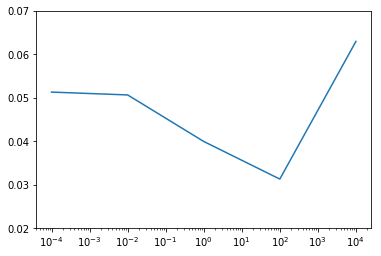

In [10]:
alpha_grid=[0.0001, 0.01, 1, 100, 10000]
err_data= genfromtxt('tmp/all_cv_scores.csv', delimiter=',')[1:]
err=np.asarray(err_data[0:-1,2])
#print(err)
ave_err=[];
for i in range(err.size//3+1):
    ave_err.append(np.mean(err[3*i:3*i+2]))
plt.plot(alpha_grid, ave_err)
plt.xscale('log')
plt.ylim([0.02,0.07])
plt.show()

When $\alpha$ is small ($\leq 0,01$), the error on validation set is large, probabaly because we're over fitting the training set.  
When $\alpha$ is appropriate, the error is small. Here $\alpha = 100$ is the smallest.  
When $\alpha$ is big ($ \geq 100$), the error is big, probably because we are penalizing large weight and thus make the weight to close to zero. Thus, it's underfitting.   
I would choose 100.

### 2C

In [8]:
num_folder=3;
x_va_F=x_all[:int(np.ceil(x_all.shape[0]/num_folder))]
y_va_F=y_all[:int(np.ceil(x_all.shape[0]/num_folder))]
w_F=genfromtxt('tmp/alpha0100.0000_fold01_weights.txt', delimiter=',')
w=w_F[:-1]
b=w_F[-1]
y_pred=np.asarray(sigm(x_va_F.dot(w)+b)).reshape(-1)
TP,TN,FP,FN, FPSample, FNSample=calc_TP_TN_FP_FN(y_va_F, y_pred>=0.5)
print(calc_confusion_matrix_for_threshold(y_va_F, y_pred, 0.5))

Predicted     0     1
True                 
0          1860    62
1            69  1943


False Negative


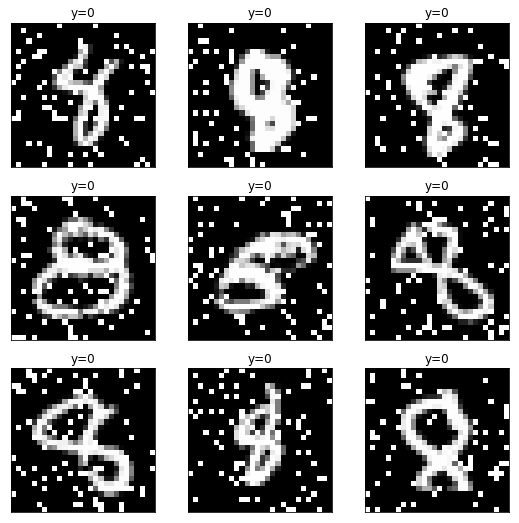

In [12]:
x_FP_9=x_va_F[FPSample]
y_FP_9=y_va_F[FPSample]
x_FN_9=x_va_F[FNSample]
y_FN_9=y_va_F[FNSample]
print("False Pos")
show_images(x_FP_9, y_FP_9)

False Positive


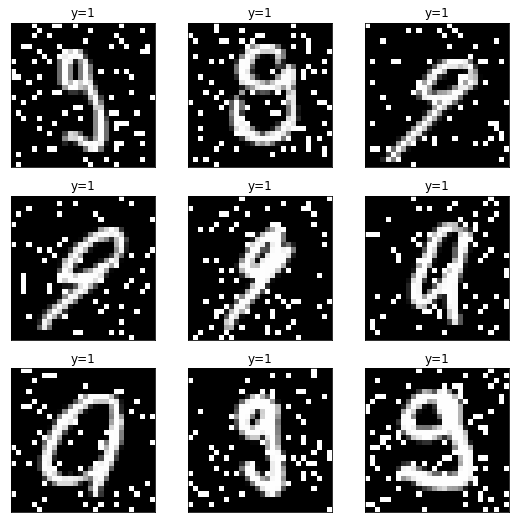

In [13]:
print("False Neg")
show_images(x_FN_9, y_FN_9)

The classifier makes mistakes in some leaned cases (FN row 3 col 1, FP row 2 col 2). It also misclassifies some examples where 9 is written not like a shape of 'q'(FP row 3 col 3). or 8 is written like a "$\theta$"(FN row 2 col 1). It can also get a wrong result when the image is a little incomplete.   
   
The classifier misidentifies when the image has some key factors for the other subject. For example, if 9 is written in a very leaned lower part like "/" but not a straight "|" or has a horizontal line at the botton, it classifies 9 as an 8. This is a linear weighted model, so once those key features outweighted, the model makes the wrong prediction.

### 2D

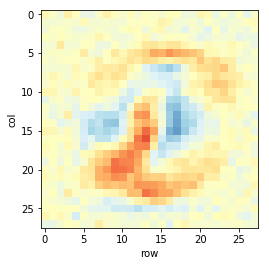

In [15]:
plt.imshow(w.reshape(28,28), interpolation='nearest', vmin=-0.5, vmax=0.5, cmap='RdYlBu')
plt.xlabel('row');
plt.ylabel('col');
plt.show()

The plot shows that the middle area[10:25, 5:22] has strong connection with the classification results. There are pixels of deep blue/red that are connected with the positive/negative classification results.   
For positive results (classified as 9), pixels[12:17, 5:10], pixels[10:17, 16:18] are significantly related.  
For negative results (classified as 8), pixels[12:17, 12:14], pixels[17:22, 6:12], pixels[20:23, 11:16] are significantly related.  

### 2E

In [14]:
lr = LRGD(alpha=100.0, step_size=0.5, num_iterations=10000,init_w_recipe='zeros')
lr.fit(x_all, y_all) 

Initializing w_G with 785 features using recipe: zeros
Running up to 10000 iters of gradient descent with step_size 0.5
iter    0/10000  loss         1.000000  avg_L1_norm_grad         0.024599  w[0]    0.000 bias    0.000
iter    1/10000  loss         0.626452  avg_L1_norm_grad         0.053024  w[0]   -0.000 bias    0.003
iter    2/10000  loss         3.983615  avg_L1_norm_grad         0.166386  w[0]    0.012 bias    0.134
iter    3/10000  loss        10.109441  avg_L1_norm_grad         0.153411  w[0]   -0.024 bias   -0.221
iter    4/10000  loss         1.603762  avg_L1_norm_grad         0.123394  w[0]    0.011 bias    0.144
iter    5/10000  loss         5.980697  avg_L1_norm_grad         0.152966  w[0]   -0.015 bias   -0.116
iter    6/10000  loss         3.571271  avg_L1_norm_grad         0.155634  w[0]    0.019 bias    0.247
iter    7/10000  loss         4.940048  avg_L1_norm_grad         0.150363  w[0]   -0.014 bias   -0.083
iter    8/10000  loss         2.345486  avg_L1_norm_grad

In [18]:
x_test_NF=genfromtxt('data_digits_8_vs_9_noisy/x_test.csv', delimiter=',')[1:]
yproba1_test_N = lr.predict_proba(x_test_NF)[:, 1]
np.savetxt('yproba1_test.txt', yproba1_test_N)

error_rate           0.033787191124558746   
AUROC     0.9949214767299642  
The error rate fits with the average error of CV(3.3%). The AUROC fits the ave AUROC of CV(0.994).